<a href="https://colab.research.google.com/github/anishsamantaray/machine-learning/blob/main/Day13_implementationproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head

<bound method NDFrame.head of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [4]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
import matplotlib.pyplot as plt


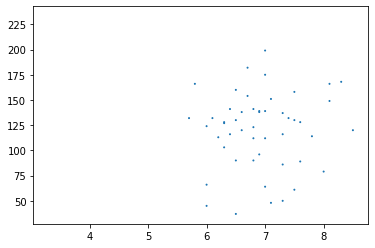

In [6]:
plt.scatter(df['cgpa'],df['iq'],df['placement'])

In [9]:
X = df.iloc[:,1:3]
Y=df.iloc[:,-1]

In [11]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler= StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [25]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


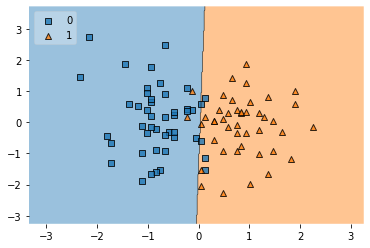

In [26]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [27]:
import pickle

In [29]:
pickle.dump(clf,open('model.pkl','wb'))